In [2]:
import pickle
from aemulusnu_massfunction.emulator import *
from aemulusnu_massfunction.fisher_utils import *

In [3]:
M = 10**np.linspace(12, 15, 150)

In [4]:
dn_dM = [emulator.predict_dndM(fiducial_cosmology, 0.8, M_c) for M_c in M]# h^4 / Mpc^3 Msun

In [5]:
h = fiducial_cosmology['H0']/100

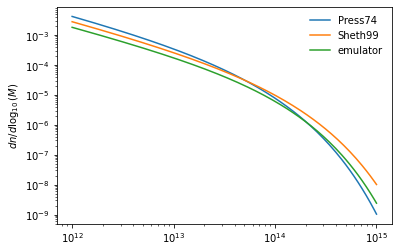

In [39]:
hmfs = []
# Press & Schechter mass function
hmfs.append(ccl.halos.MassFuncPress74(mass_def='200m', mass_def_strict=False))

# Sheth & Tormen mass function
hmfs.append(ccl.halos.MassFuncSheth99(mass_def='200m', mass_def_strict=False))

# Let's plot all of them at z=0
plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(0.8))
    plt.plot(M, nm, label=mf.name)
    
plt.plot(M, dn_dM*M*np.log(10)*h**4, label='emulator')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/d\log_{10}(M)$')
plt.legend(frameon=False)

In [14]:
halo_bias = ccl.halos.HaloBiasTinker10()
fiducial_h = fiducial_cosmology['H0']/100
halo_bias(fiducial_ccl_cosmo, 1e14 *  fiducial_h, 1) #[Mass] is Msun / h

1.5606575620098777